### This notebook explores the product related data on Google.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = './Data/Amazon-GoogleProducts/'
GOOGLE_DATA = DATA_PATH + "GoogleProducts.csv"

google_products = pd.read_csv(GOOGLE_DATA, engine='python')

In [3]:
google_products.head()

,id,name,description,manufacturer,price
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,intuit,38.99
1,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,NaN,8.49
2,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,intuit,637.99
3,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,NaN,12.95
4,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,adobe software,805.99


In [4]:
count_google_products = len(google_products)
google_products.dtypes

id              object
name            object
description     object
manufacturer    object
price           object
dtype: object

In [5]:
#google_products['manufacturer'].isnull().sum()

## Top manufacturers in Google

In [6]:
manufacturer_product = google_products.groupby('manufacturer').size().reset_index(name='Count')
manufacturer_product.sort_values(by=['Count'], inplace=True, ascending=False)
#manufacturer_product

[Text(0, 0.5, 'Product count'), Text(0.5, 0, 'Manufacturer')]

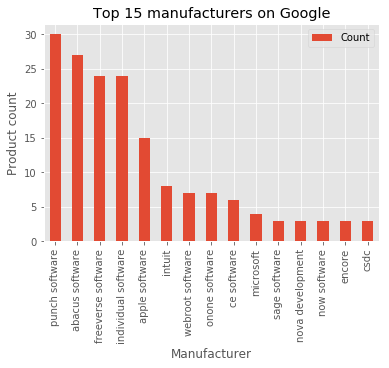

In [7]:
plt.style.use('ggplot')

ax = manufacturer_product.iloc[:15].plot.bar(x='manufacturer', y='Count', title="Top 15 manufacturers on Google")
ax.set(xlabel="Manufacturer" , ylabel="Product count")

## Average pricing per manufacturer

In [8]:
google_products["processed_price"]= google_products["price"].apply(lambda x: x.replace("gbp", "").strip())
google_products["processed_price"] = google_products["processed_price"].astype('float')
manufacturer_price = google_products.groupby('manufacturer')['processed_price'].mean().reset_index(name="avg price")
manufacturer_price.sort_values(by=['avg price'], inplace=True, ascending=False)
#manufacturer_price

Text(0.5, 1.0, 'Average pricing per manufacturer(top 15) on Google')

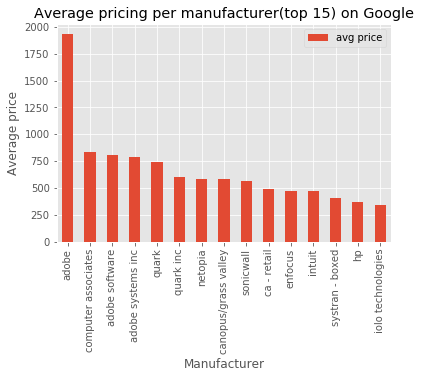

In [9]:
manufacturer_price.iloc[:15].plot.bar(x='manufacturer', y='avg price')
plt.xlabel('Manufacturer')
plt.ylabel('Average price')
plt.title('Average pricing per manufacturer(top 15) on Google')

## Length of product descriptions

In [10]:
google_products['description'].fillna(value="", inplace=True)
google_products['description_length'] = google_products['description'].apply(lambda x: len(x.split()))

In [11]:
google_products.head()

,id,name,description,manufacturer,price,processed_price,description_length
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,intuit,38.99,38.99,3
1,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,NaN,8.49,8.49,24
2,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,intuit,637.99,637.99,17
3,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,NaN,12.95,12.95,35
4,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,adobe software,805.99,805.99,12


Text(0.5, 1.0, 'Length of product descriptions on Google')

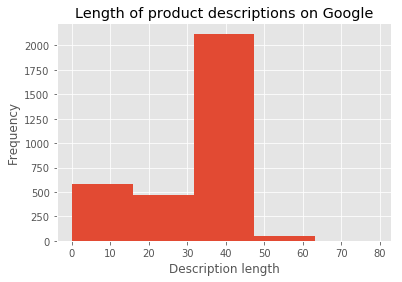

In [12]:
google_products.description_length.hist(bins=5)
plt.xlabel('Description length')
plt.ylabel('Frequency')
plt.title('Length of product descriptions on Google')